# **ANÁLISIS Y MODELO DE MACHINE LEARNING PARA DATOS METEOROLÓGICOS DE MONTERREY, NUEVO LEÓN, MÉXICO**

In [178]:
import pandas as pd

### Leemos nuestro archivo CSV procesdo en AWS desde GITHUB y hacemos una transformación

In [27]:
url = "https://raw.githubusercontent.com/JesusVargasF/proyecto-analisis-meteorologico-mty/refs/heads/main/clima_transformado.csv"
df_clima = pd.read_csv(url)

Renombramos las columnas para un mejor manejo (Se pudo realizar igualmente en AWS pero se realizo aqui para demostrar la transformacion en ambas plataformas)

In [43]:
df_clima.rename(columns={
    "date": "Fecha",
    "temperature_2m_max": "Temperatura_maxima",
    "temperature_2m_min": "Temperatura_minima",
    "temperature_2m_mean": "Temperatura_promedio",
    "rain_sum": "Lluvia_total",
    "wind_speed_10m_max": "Velocidad_viento",
    "shortwave_radiation_sum": "Radiacion_solar",
    "precipitation_hours" : "Horas_de_Precipitacion"
},inplace=True)

Revisamos los primeros y ultimos registros de nuestros datos para verificar el rango de fechas.

In [44]:
df_clima.head()

,Fecha,Temperatura_maxima,Temperatura_minima,Temperatura_promedio,Lluvia_total,Horas_de_Precipitacion,Velocidad_viento,Radiacion_solar,id
0,2020-01-01,16.9405,9.690500,13.163418,18.5,24.0,12.240000,4.96,de111919-0a12-43d4-8f5b-bc5b42b4df47
1,2020-01-02,18.6405,11.140500,14.478001,4.4,15.0,12.387348,6.05,2709d3c8-006f-40b8-8f33-3b31f93052fb
2,2020-01-03,19.0905,9.990500,15.886334,0.0,0.0,29.215502,15.44,b9610198-66bc-4cef-8024-a990fbe37a77
3,2020-01-04,18.1905,7.590500,12.559253,0.0,0.0,10.002560,16.55,f281a03a-db0a-4db8-8453-c7ebe235b059
4,2020-01-05,21.1405,10.040501,14.955086,0.0,0.0,7.280550,16.55,0f2e974d-333d-49ec-8efa-90575b360c05


In [45]:
df_clima.tail()

,Fecha,Temperatura_maxima,Temperatura_minima,Temperatura_promedio,Lluvia_total,Horas_de_Precipitacion,Velocidad_viento,Radiacion_solar,id
1822,2024-12-27,27.2405,11.940500,19.003000,0.0,0.0,7.814985,15.26,0947c399-15f3-49b9-b5fb-8baedb3af99f
1823,2024-12-28,31.4905,11.940500,20.578000,0.0,0.0,18.275984,16.08,152a7cd3-92ac-4b61-a2e0-114de56bef69
1824,2024-12-29,26.8905,9.640500,18.017584,0.0,0.0,7.731622,16.19,3115882d-bc9e-478f-9c13-41198038025f
1825,2024-12-30,31.0905,10.290501,19.842585,0.0,0.0,8.909545,16.58,8d9bc652-34ca-4e91-aebb-216e142eec83
1826,2024-12-31,29.2405,12.490500,20.144667,0.0,0.0,10.661107,16.36,9b9c6cd9-7bff-45a5-bb19-698017dd1c2f


Revisamos el numero de datos duplicados

In [46]:
num_duplicados = df_clima.duplicated().sum()
print(f"Numero de duplicados: {num_duplicados}")

Numero de duplicados: 0


Revisamos el numero de datos que tiene un valor NULL

In [47]:
num_null = df_clima.isnull().sum()
print(f"Numero de datos Null: \n{num_null}")

Numero de datos Null: 
Fecha                     0
Temperatura_maxima        0
Temperatura_minima        0
Temperatura_promedio      0
Lluvia_total              0
Horas_de_Precipitacion    0
Velocidad_viento          0
Radiacion_solar           0
id                        0
dtype: int64


Revisamos las estadisticas basicas de nuestros datos

In [48]:
df_clima.describe()

,Temperatura_maxima,Temperatura_minima,Temperatura_promedio,Lluvia_total,Horas_de_Precipitacion,Velocidad_viento,Radiacion_solar
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,28.198738,17.202186,22.315903,1.708812,2.781062,14.673740,19.246754
std,6.769186,5.764061,6.027130,6.304632,4.876819,4.536718,6.038004
min,5.390500,-6.709500,-0.172000,0.000000,0.000000,4.553680,2.550000
25%,23.890500,13.440500,18.406126,0.000000,0.000000,11.503113,15.600000
50%,29.140500,18.490500,23.296753,0.000000,0.000000,14.494192,19.790000
75%,33.190502,21.940500,26.864460,0.700000,4.000000,17.525751,24.160000
max,44.590500,27.090500,34.928000,121.799995,24.000000,30.551254,29.750000


Revisamos que la temperatura promedio mas baja no sea un dato incorrecto checando los registos de todos los dias en que la temperatura fue menor a 1 grado.
Podemos observar que se registraron temperaturas bajas los dias 14 a 17 de Febrero de 2021, asi que el dato es correcto.

In [71]:
# Filtrar los registros donde la temperatura_promedio sea menor o igual a 1
registros_filtrados = df_clima[df_clima['Temperatura_minima'] < 1]

# Mostrar los registros filtrados
registros_filtrados.head()

,Fecha,Temperatura_maxima,Temperatura_minima,Temperatura_promedio,Lluvia_total,Horas_de_Precipitacion,Velocidad_viento,Radiacion_solar,id
377,2021-01-12,8.440500,0.9405,4.713417,0.0,0.0,13.378250,11.90,2d34e665-d2fd-415b-bd10-da3efccdf2b8
410,2021-02-14,7.840500,-0.3095,2.136334,0.4,5.0,21.578989,10.45,d5bbf601-1ebc-4824-91fd-2051701efe38
411,2021-02-15,5.990500,-4.8595,-0.172000,0.0,0.0,14.168641,19.38,66445f84-28af-40ec-a37f-d1d84b4b7eb0
412,2021-02-16,8.290501,-6.7095,0.617583,0.0,0.0,14.241630,21.02,b7cbdf26-1c87-413c-9cd4-3368a89dfee1
413,2021-02-17,18.740500,-0.2595,8.088416,0.0,0.0,12.758432,20.87,ced8af51-0a06-46e0-a8aa-e2bb4a0ffb5b


Realizo una transformacion multiclase para poder clasificar la temperatura promedio en Alta,Moderada,baja

In [81]:
# Creamos una función para clasificar la temperatura
def clasificar_temperatura(temp):
    if temp < 15:
        return 'Baja'
    elif 15 <= temp < 26:
        return 'Moderada'
    else:
        return 'Alta'

# Aplicar la función para crear la nueva columna
df_clima['Clase_temperatura'] = df_clima['Temperatura_promedio'].apply(clasificar_temperatura)

df_clima.head()

,Fecha,Temperatura_maxima,Temperatura_minima,Temperatura_promedio,Lluvia_total,Horas_de_Precipitacion,Velocidad_viento,Radiacion_solar,id,Clase_temperatura
0,2020-01-01,16.9405,9.690500,13.163418,18.5,24.0,12.240000,4.96,de111919-0a12-43d4-8f5b-bc5b42b4df47,Baja
1,2020-01-02,18.6405,11.140500,14.478001,4.4,15.0,12.387348,6.05,2709d3c8-006f-40b8-8f33-3b31f93052fb,Baja
2,2020-01-03,19.0905,9.990500,15.886334,0.0,0.0,29.215502,15.44,b9610198-66bc-4cef-8024-a990fbe37a77,Moderada
3,2020-01-04,18.1905,7.590500,12.559253,0.0,0.0,10.002560,16.55,f281a03a-db0a-4db8-8453-c7ebe235b059,Baja
4,2020-01-05,21.1405,10.040501,14.955086,0.0,0.0,7.280550,16.55,0f2e974d-333d-49ec-8efa-90575b360c05,Baja


## ANALISIS EXPLORATIRIO

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

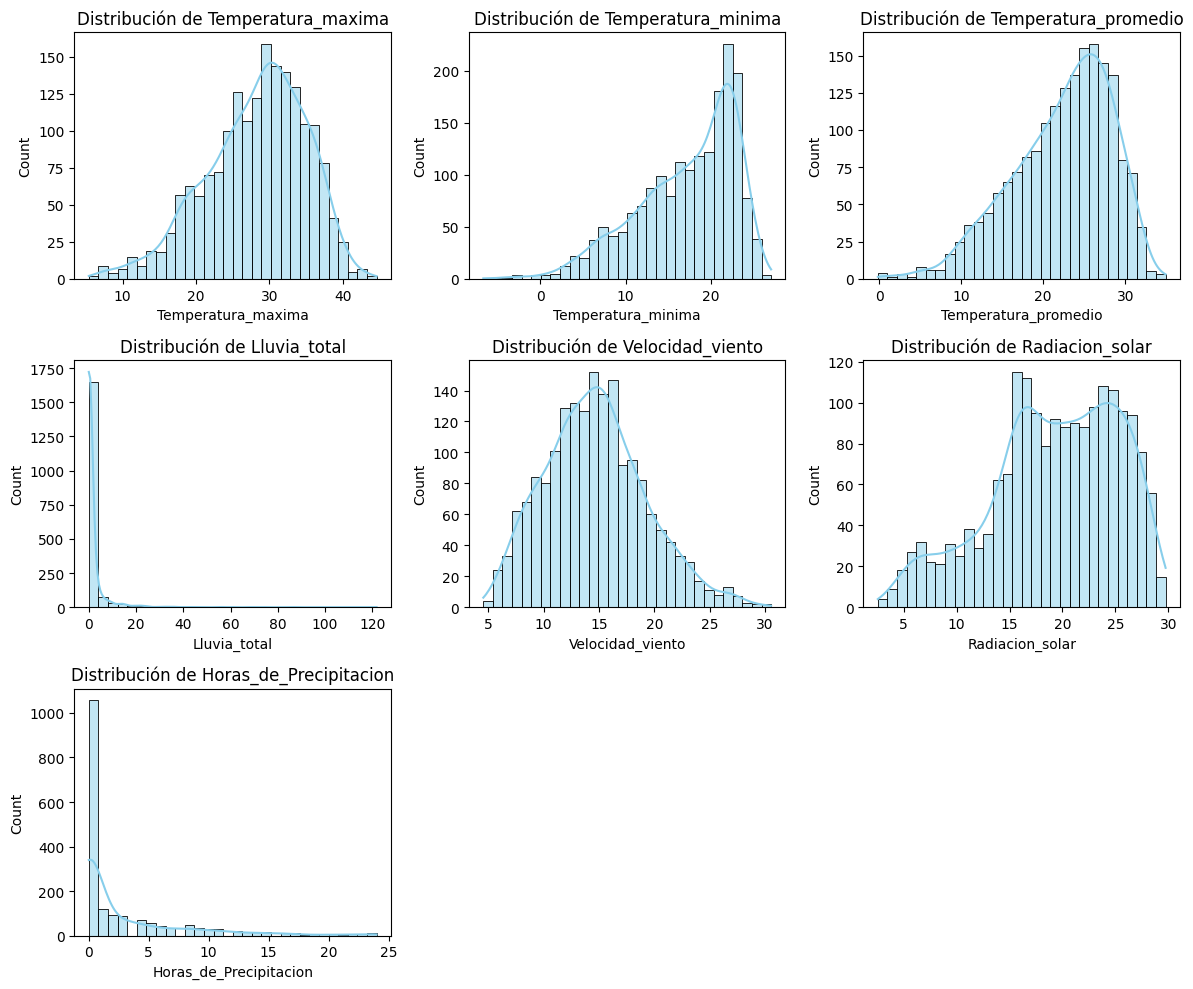

In [90]:
# Establecer las variables numericas a graficar
numerical_columns = ['Temperatura_maxima', 'Temperatura_minima', 'Temperatura_promedio', 'Lluvia_total', 'Velocidad_viento', 'Radiacion_solar', 'Horas_de_Precipitacion']
# Configuran el tamaño del gráfico
plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_clima[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

Utilizamos nuestra transformacion de Clase de Temperatura para ver que temperatura es la predominante

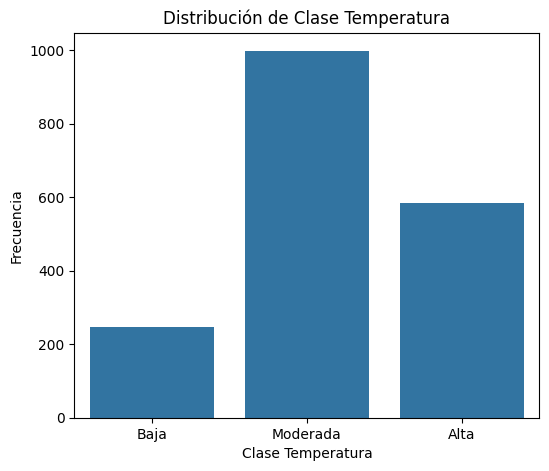

In [93]:
# Grafico de clase temperatura
plt.figure(figsize=(6, 5))
sns.countplot(data=df_clima, x='Clase_temperatura')
plt.title('Distribución de Clase Temperatura')
plt.xlabel('Clase Temperatura')
plt.ylabel('Frecuencia')
plt.show()

Scatter plot para la relacion de cada temperatura (Varibles predictoras) con la radiacion solar (Variable objetivo)

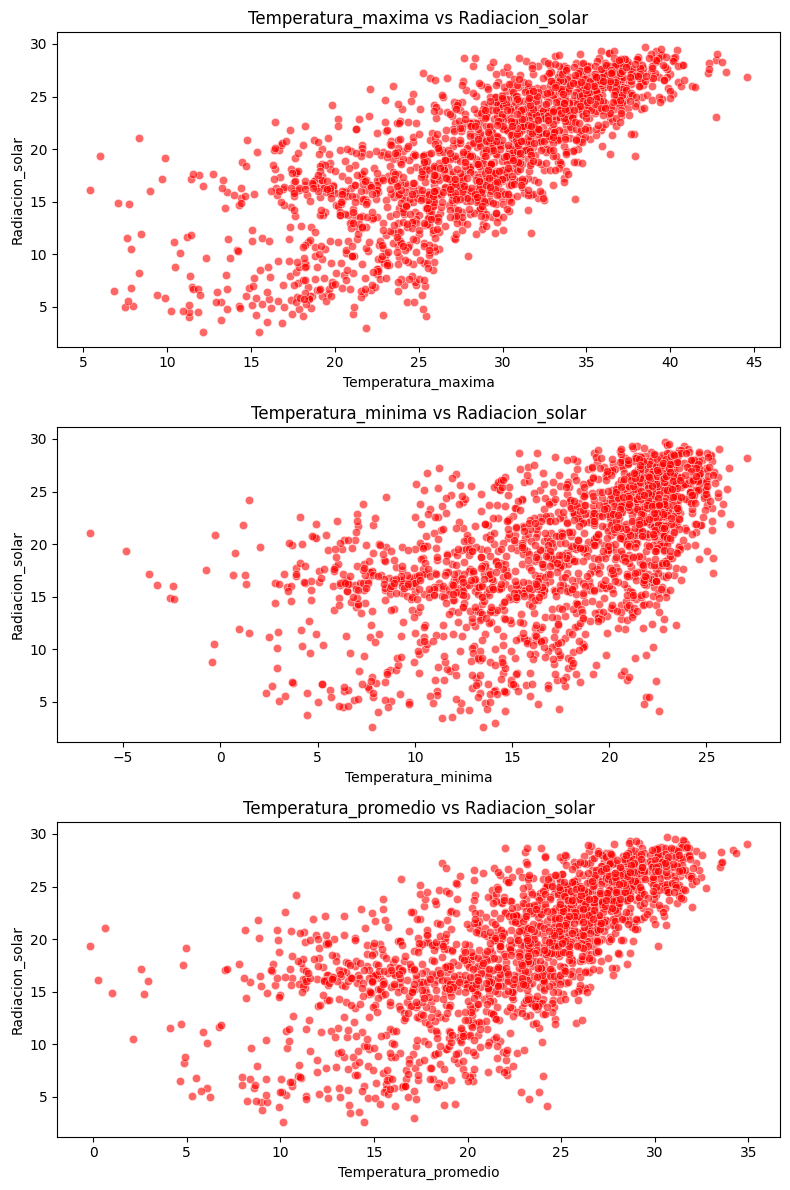

In [101]:
# Filtrar solo las columnas relacionadas con las temperaturas
temperature_columns = ['Temperatura_maxima', 'Temperatura_minima', 'Temperatura_promedio']

plt.figure(figsize=(8, 12))
for i, col in enumerate(temperature_columns):
    plt.subplot(3, 1, i + 1)  # 3 filas, 1 columna
    sns.scatterplot(y=df_clima['Radiacion_solar'], x=df_clima[col], color="red", alpha=0.6)
    plt.title(f'{col} vs Radiacion_solar')
    plt.ylabel('Radiacion_solar')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Revisamos la variacion de la temperatura a traves del rango de tiempo

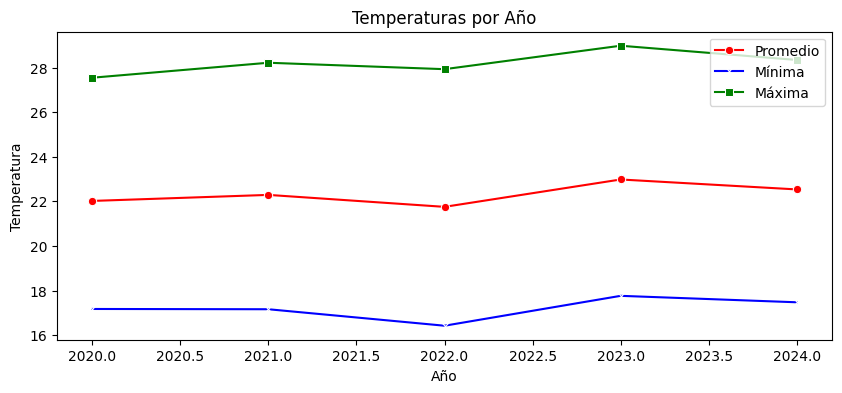

In [137]:
# Lineplot de la temperatura promedio, mínima y máxima por año
df_clima['Fecha'] = pd.to_datetime(df_clima['Fecha'])
df_clima['Año'] = df_clima['Fecha'].dt.year
plt.figure(figsize=(10, 4))
# Temperatura Promedio
sns.lineplot(data=df_clima, x='Año', y='Temperatura_promedio', color='red', errorbar=None, marker="o", label='Promedio')
# Temperatura Mínima
sns.lineplot(data=df_clima, x='Año', y='Temperatura_minima', color='blue', errorbar=None, marker="x", label='Mínima')
# Temperatura Máxima
sns.lineplot(data=df_clima, x='Año', y='Temperatura_maxima', color='green', errorbar=None, marker="s", label='Máxima')
plt.title('Temperaturas por Año')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

## **Matriz de correlación de los datos**

In [134]:
# Seleccionar solo las columnas numéricas
df_numericas = df_clima.select_dtypes(include=["number"]).drop(columns=["Año"], errors="ignore")

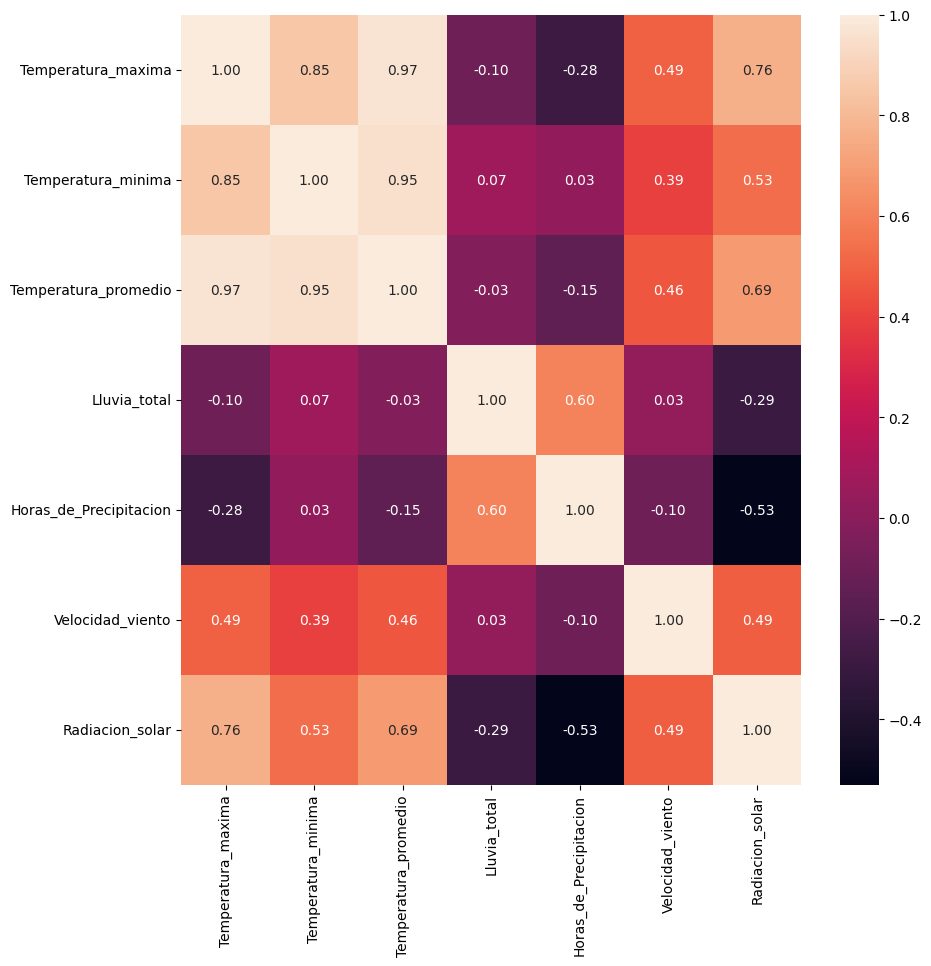

In [135]:
# Matriz de correlación
plt.figure(figsize=(10,10))
sns.heatmap(df_numericas.corr(), annot=True, fmt='.2f')
plt.show()

# **COMENZAMOS LOS PASOS PARA CREAR EL MODELO**

In [138]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Realizamos el MinMaxScaler

In [180]:
numerical_columns = ['Temperatura_maxima', 'Temperatura_minima', 'Temperatura_promedio', 'Lluvia_total', 'Velocidad_viento', 'Radiacion_solar', 'Horas_de_Precipitacion']
df_clima_scaled = df_clima.copy()
scaler = MinMaxScaler()
df_clima_scaled[numerical_columns] = scaler.fit_transform(df_clima_scaled[numerical_columns])

print("DataFrame escalado con MinMaxScaler:")
df_clima_scaled.describe()

DataFrame escalado con MinMaxScaler:


,Fecha,Temperatura_maxima,Temperatura_minima,Temperatura_promedio,Lluvia_total,Horas_de_Precipitacion,Velocidad_viento,Radiacion_solar,Año
count,1827,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,2022-07-02 00:00:00.000000256,0.581843,0.707446,0.640681,0.014030,0.115878,0.389269,0.613851,2022.000000
min,2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000
25%,2021-04-01 12:00:00,0.471939,0.596154,0.529291,0.000000,0.000000,0.267311,0.479779,2021.000000
50%,2022-07-02 00:00:00,0.605867,0.745562,0.668625,0.000000,0.000000,0.382363,0.633824,2022.000000
75%,2023-10-01 12:00:00,0.709184,0.847633,0.770270,0.005747,0.166667,0.498972,0.794485,2023.000000
max,2024-12-31 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024.000000
std,NaN,0.172683,0.170534,0.171713,0.051762,0.203201,0.174505,0.221985,1.415375


Realizamos el StandardScaler


In [181]:
df_clima_ss = df_clima.copy()

scaler_standar = StandardScaler()
df_clima_ss[numerical_columns] = scaler_standar.fit_transform(df_clima_ss[numerical_columns])
print("DataFrame escalado con StandardScaler:")
df_clima_ss.describe()

DataFrame escalado con StandardScaler:


,Fecha,Temperatura_maxima,Temperatura_minima,Temperatura_promedio,Lluvia_total,Horas_de_Precipitacion,Velocidad_viento,Radiacion_solar,Año
count,1827,1.827000e+03,1.827000e+03,1.827000e+03,1.827000e+03,1.827000e+03,1.827000e+03,1.827000e+03,1827.000000
mean,2022-07-02 00:00:00.000000256,-2.333474e-17,-5.444772e-17,8.556070e-17,-5.055860e-17,5.833684e-18,2.761277e-16,5.911467e-16,2022.000000
min,2020-01-01 00:00:00,-3.370343e+00,-4.149545e+00,-3.732135e+00,-2.711150e-01,-5.704176e-01,-2.231312e+00,-2.766034e+00,2020.000000
25%,2021-04-01 12:00:00,-6.366226e-01,-6.527890e-01,-6.488740e-01,-2.711150e-01,-5.704176e-01,-6.990726e-01,-6.041322e-01,2021.000000
50%,2022-07-02 00:00:00,1.391630e-01,2.235693e-01,1.627837e-01,-2.711150e-01,-5.704176e-01,-3.958745e-02,8.999571e-02,2022.000000
75%,2023-10-01 12:00:00,7.376264e-01,8.222695e-01,7.548871e-01,-1.600551e-01,2.500138e-01,6.288228e-01,8.139429e-01,2023.000000
max,2024-12-31 00:00:00,2.422189e+00,1.715981e+00,2.093127e+00,1.905330e+01,4.352170e+00,3.500738e+00,1.739999e+00,2024.000000
std,NaN,1.000274e+00,1.000274e+00,1.000274e+00,1.000274e+00,1.000274e+00,1.000274e+00,1.000274e+00,1.415375


## Definimos nuestras variables predictoras y la objetivo con SelectKBest

In [146]:
from sklearn.feature_selection import SelectKBest, f_regression

In [153]:
predictoras = ["Temperatura_maxima", "Temperatura_minima", "Temperatura_promedio", "Lluvia_total", "Velocidad_viento", "Horas_de_Precipitacion"]
objetivo = "Radiacion_solar"

x = df_clima_scaled[predictoras]
y = df_clima_scaled[objetivo]

In [154]:
k = 3
selector = SelectKBest(score_func=f_regression, k=k)
x_new = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support()]
print("Variables seleccionadas por SelectKBest:")
print(selected_features.tolist())

Variables seleccionadas por SelectKBest:
['Temperatura_maxima', 'Temperatura_minima', 'Temperatura_promedio']


## Creamos y probamos el primer modelo

Nuestro modelo buscará predecir la radiacion solar con las variables predictoras de tempertura minima, promedio y maxima


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [172]:
threshold = df_clima_scaled['Radiacion_solar'].median()
df_clima_scaled['Alta_radiacion'] = (df_clima_scaled['Radiacion_solar'] > threshold).astype(int)
df_clima_scaled.describe()

,Temperatura_maxima,Temperatura_minima,Temperatura_promedio,Lluvia_total,Horas_de_Precipitacion,Velocidad_viento,Radiacion_solar,Alta_radiacion
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,28.198738,17.202186,22.315903,1.708812,2.781062,14.673740,19.246754,0.499726
std,6.769186,5.764061,6.027130,6.304632,4.876819,4.536718,6.038004,0.500137
min,5.390500,-6.709500,-0.172000,0.000000,0.000000,4.553680,2.550000,0.000000
25%,23.890500,13.440500,18.406126,0.000000,0.000000,11.503113,15.600000,0.000000
50%,29.140500,18.490500,23.296753,0.000000,0.000000,14.494192,19.790000,0.000000
75%,33.190502,21.940500,26.864460,0.700000,4.000000,17.525751,24.160000,1.000000
max,44.590500,27.090500,34.928000,121.799995,24.000000,30.551254,29.750000,1.000000


In [174]:
# Definir las variables preductoras y la objetivo
predictoras = ["Temperatura_maxima", "Temperatura_minima", "Temperatura_promedio"]
objetivo = "Alta_radiacion"

# Variables predictoras en X y la objetivo en Y
x = df_clima_scaled[predictoras]
y = df_clima_scaled[objetivo]

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Entrenar el modelo RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [175]:
# Realizar predicciones y evaluar el modelo random forest
y_pred = rf_model.predict(x_test)

In [176]:
# Cálculo de métricas para RandomForest
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=True)
recall = recall_score(y_test, y_pred, average='macro', zero_division=True)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=True)

print("Accuracy:", accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1-score (macro):", f1)

Accuracy: 0.8415300546448088
Precision (macro): 0.8413760152890588
Recall (macro): 0.8426036921601534
F1-score (macro): 0.8413595193256209


## **OBTENEMOS NUESTRA MATRIZ DE CONFUSION**



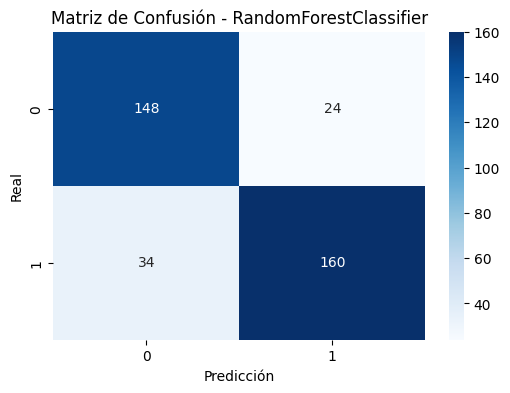

In [177]:
cm_rf = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - RandomForestClassifier")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()